# Лабораторная работа 3. Бутстрап-оценки.
Выполнили:

Бровкин Аким Алексеевич, ИСУ 465282, группа J3110

Воробьёв Андрей Павлович, ИСУ 465440, группа J3111

Шакина Анна Сергеевна, ИСУ 396675, группа J3111

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

np.random.seed(275)

# Генерация данных и базовые оценки
1. Сгенерируйте выборку объема N = 500 из непрерывного распределения с произвольными
параметрами (см. описание предыдущей лабораторной работы).
2. Рассчитайте точечные оценки:
* Выборочное среднее, медиану, дисперсию, интерквартильный размах (IQR)
* Постройте теоретеческие значения этих величин и сравните точечные оценку с теоретическими значениями.
3. Постройте гистограмму данных с наложением ядерной оценки плотности (KDE). Сравните
KDE с гистограммой при разном числе бинов (3 значения, заданные вручную).


In [2]:
N = 500
data = np.random.normal(loc=5, scale=2, size=N)

In [3]:
print(f"Выборочное среднее: {np.mean(data)}, теоретическое: 5")
print(f"Медиана: {np.median(data)}, теоретическая: 5")
print(f"Дисперсия: {np.var(data)}, теоретическая: 4")

# Считаем интерквартильный размах
new_data = np.sort(data)
Q1 = new_data[N // 4]
Q3 = new_data[3 * N // 4]

print(f"Интерквартильный размах: {np.percentile(data, 75) - np.percentile(data, 25)}, теоретический: {Q3 - Q1}")

Выборочное среднее: 5.178384546613714, теоретическое: 5
Медиана: 5.126903938243477, теоретическая: 5
Дисперсия: 3.9740601083194456, теоретическая: 4
Интерквартильный размах: 2.630500879508463, теоретический: 2.6416731391853796


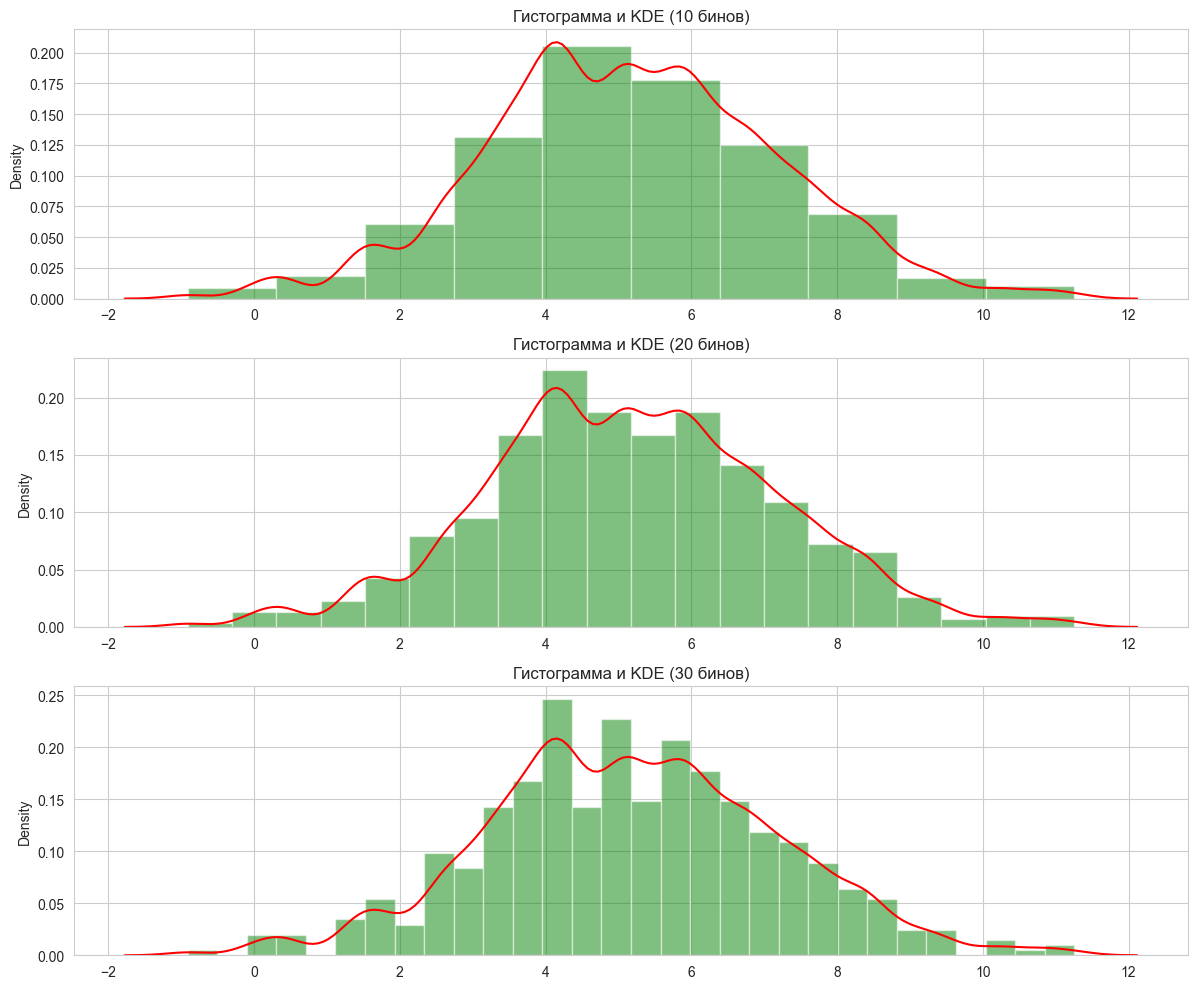

In [4]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.hist(data, bins=10, density=True, alpha=0.5, color='g')
sns.kdeplot(data, bw_adjust=0.5, color='r')
plt.title('Гистограмма и KDE (10 бинов)')

plt.subplot(3, 1, 2)
plt.hist(data, bins=20, density=True, alpha=0.5, color='g')
sns.kdeplot(data, bw_adjust=0.5, color='r')
plt.title('Гистограмма и KDE (20 бинов)')

plt.subplot(3, 1, 3)
plt.hist(data, bins=30, density=True, alpha=0.5, color='g')
sns.kdeplot(data, bw_adjust=0.5, color='r')
plt.title('Гистограмма и KDE (30 бинов)')
plt.tight_layout()
plt.show()

# Бутстрап для точечных оценок
1. Реализуйте алгоритм бутстрапа:
* Сгенерируйте B = 1000 бутстрап-выборок (с возвращением)
* Для каждой выборки вычислите: среднее, медиану, дисперсию, IQR
2. Постройте гистограммы распределения бутстрап-оценок для каждой статистики. Нанесите
исходные оценки вертикальными линиями.

In [5]:
B = 1000
means = np.zeros(B)
medians = np.zeros(B)
variances = np.zeros(B)
iqrs = np.zeros(B)

for i in range(B):
    sample = np.random.choice(data, size=N, replace=True)
    means[i] = np.mean(sample)
    medians[i] = np.median(sample)
    variances[i] = np.var(sample)
    iqrs[i] = np.percentile(sample, 75) - np.percentile(sample, 25)

In [6]:
def plot_hist(data, title, true_value):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True)
    plt.axvline(true_value, color='r', linestyle='--', label='Настоящее значение')
    plt.title(title)
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

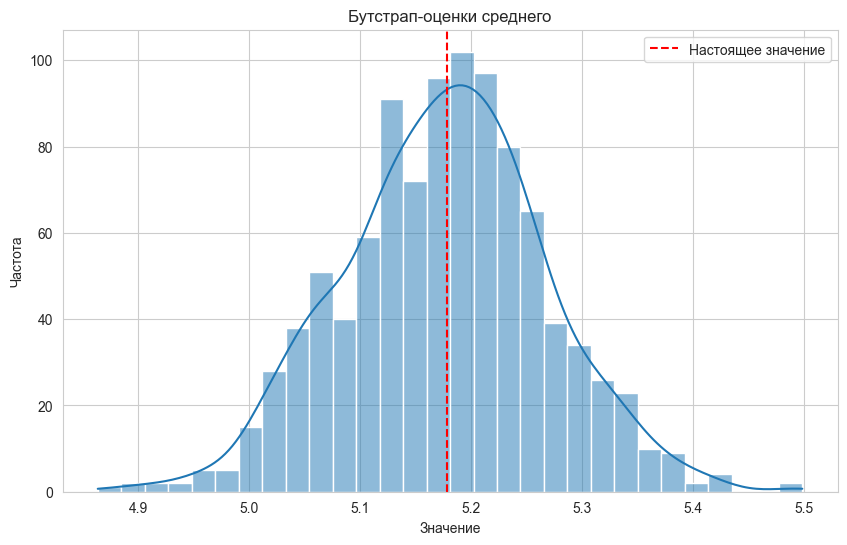

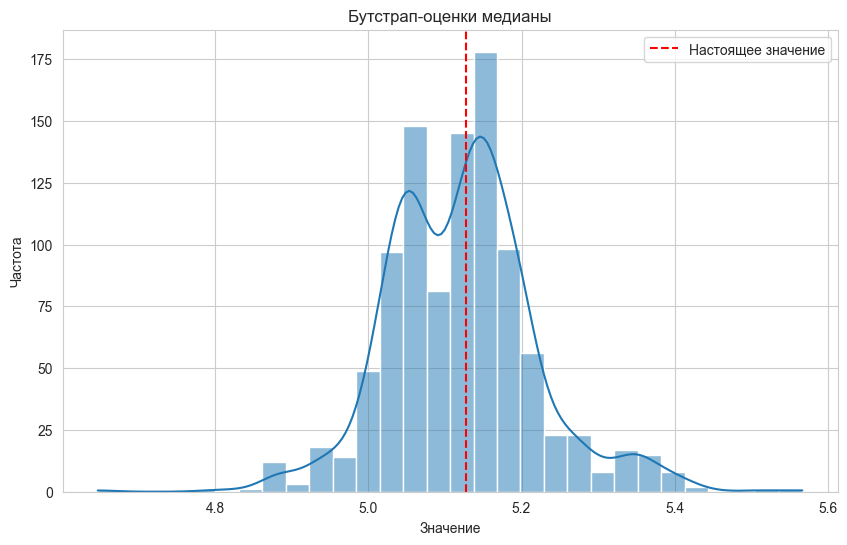

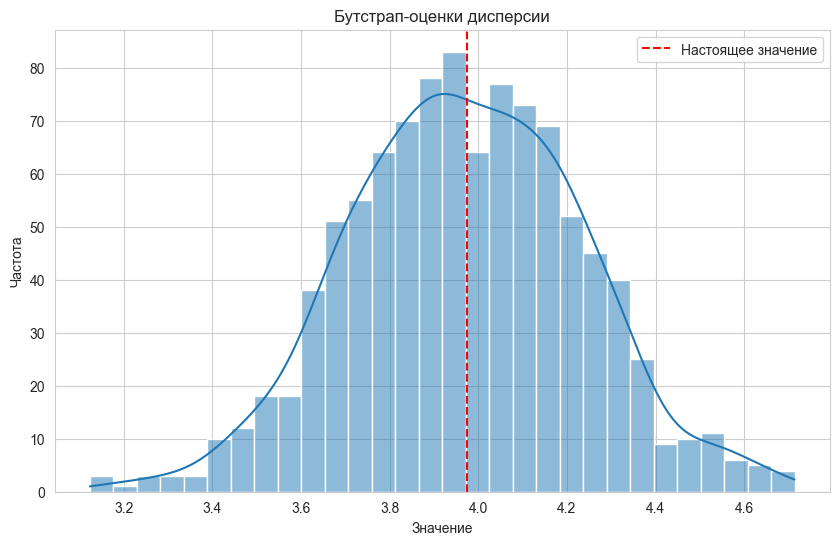

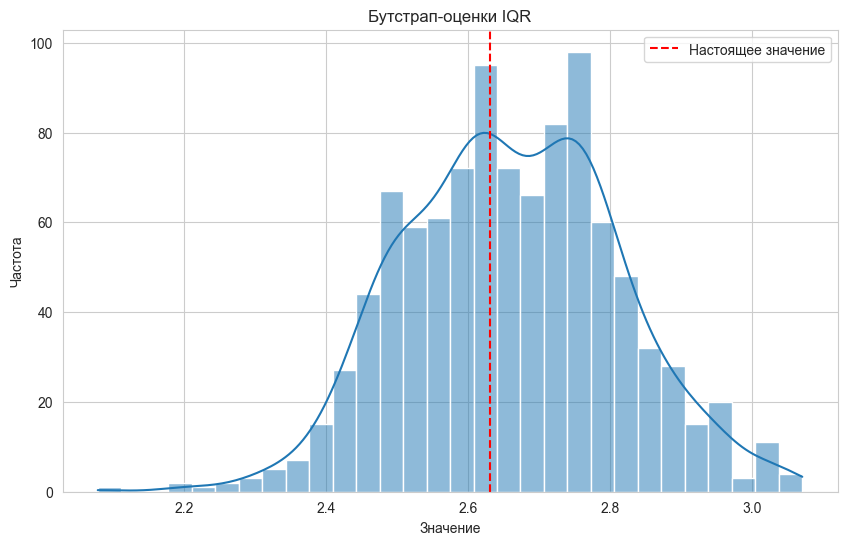

In [7]:
plot_hist(means, 'Бутстрап-оценки среднего', np.mean(data))
plot_hist(medians, 'Бутстрап-оценки медианы', np.median(data))
plot_hist(variances, 'Бутстрап-оценки дисперсии', np.var(data))
plot_hist(iqrs, 'Бутстрап-оценки IQR', np.percentile(data, 75) - np.percentile(data, 25))

# Построение доверительных интервалов
1. Используя процентильный метод, постройте доверительные интервалы для:
    * Среднего и медианы
    * Уровней доверия: 90% (α = 0.1), 95% (α = 0.05), 99% (α = 0.01)
2. Визуализируйте интервалы для каждой статистики на отдельных графиках.

In [8]:
def bootstrap_ci(data, alpha=0.05):
    lower = np.percentile(data, 100 * (alpha / 2))
    upper = np.percentile(data, 100 * (1 - alpha / 2))
    return lower, upper

In [9]:
alphas = [0.1, 0.05, 0.01]
means_ci = {}
medians_ci = {}
variances_ci = {}
iqrs_ci = {}
for alpha in alphas:
    means_ci[alpha] = bootstrap_ci(means, alpha)
    medians_ci[alpha] = bootstrap_ci(medians, alpha)
    variances_ci[alpha] = bootstrap_ci(variances, alpha)
    iqrs_ci[alpha] = bootstrap_ci(iqrs, alpha)

res = pd.DataFrame()
res['mean_ci_lower'], res['mean_ci_upper'] = zip(*means_ci.values())
res['median_ci_lower'], res['median_ci_upper'] = zip(*medians_ci.values())
res['variance_ci_lower'], res['variance_ci_upper'] = zip(*variances_ci.values())
res['iqr_ci_lower'], res['iqr_ci_upper'] = zip(*iqrs_ci.values())
res['alpha'] = alphas
res = res.set_index('alpha')
res

,mean_ci_lower,mean_ci_upper,median_ci_lower,median_ci_upper,variance_ci_lower,variance_ci_upper,iqr_ci_lower,iqr_ci_upper
alpha,,,,,,,,
0.10,5.023647,5.328578,4.984645,5.296539,3.541475,4.379643,2.429846,2.914986
0.05,5.003897,5.358203,4.937886,5.354807,3.456896,4.509757,2.389583,2.952789
0.01,4.935276,5.414547,4.873379,5.409128,3.272597,4.637167,2.276260,3.036818


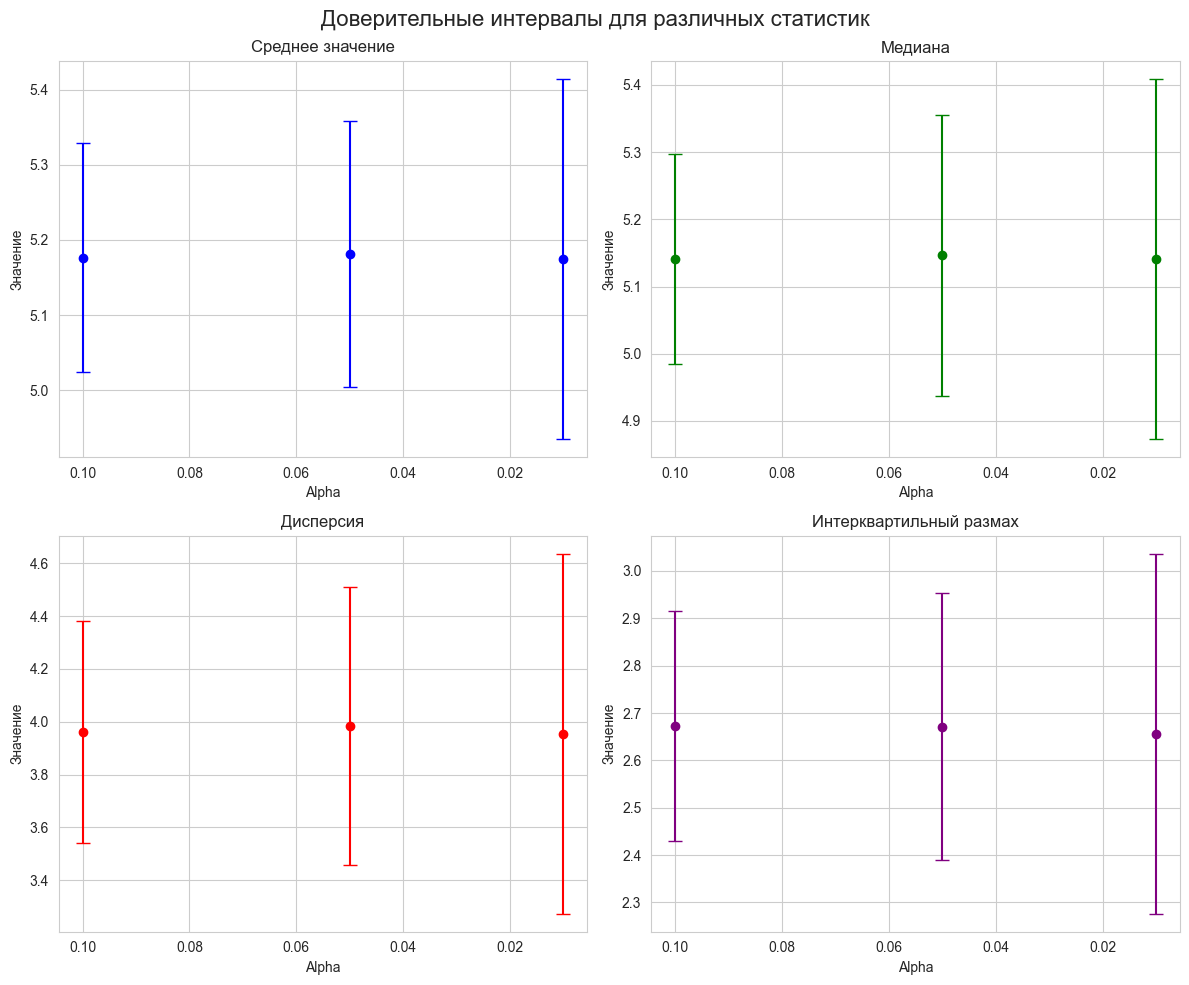

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Доверительные интервалы для различных статистик', fontsize=16)

axes[0, 0].errorbar(res.index, (res['mean_ci_lower'] + res['mean_ci_upper'])/2,
                     yerr=(res['mean_ci_upper'] - res['mean_ci_lower'])/2,
                     fmt='o', capsize=5, color='blue')
axes[0, 0].set_title('Среднее значение')
axes[0, 0].set_xlabel('Alpha')
axes[0, 0].set_ylabel('Значение')
axes[0, 0].invert_xaxis()

axes[0, 1].errorbar(res.index, (res['median_ci_lower'] + res['median_ci_upper'])/2,
                     yerr=(res['median_ci_upper'] - res['median_ci_lower'])/2,
                     fmt='o', capsize=5, color='green')
axes[0, 1].set_title('Медиана')
axes[0, 1].set_xlabel('Alpha')
axes[0, 1].set_ylabel('Значение')
axes[0, 1].invert_xaxis()

axes[1, 0].errorbar(res.index, (res['variance_ci_lower'] + res['variance_ci_upper'])/2,
                     yerr=(res['variance_ci_upper'] - res['variance_ci_lower'])/2,
                     fmt='o', capsize=5, color='red')
axes[1, 0].set_title('Дисперсия')
axes[1, 0].set_xlabel('Alpha')
axes[1, 0].set_ylabel('Значение')
axes[1, 0].invert_xaxis()

axes[1, 1].errorbar(res.index, (res['iqr_ci_lower'] + res['iqr_ci_upper'])/2,
                     yerr=(res['iqr_ci_upper'] - res['iqr_ci_lower'])/2,
                     fmt='o', capsize=5, color='purple')
axes[1, 1].set_title('Интерквартильный размах')
axes[1, 1].set_xlabel('Alpha')
axes[1, 1].set_ylabel('Значение')
axes[1, 1].invert_xaxis()

plt.tight_layout()
plt.show()

# Влияние объёма выборки и числа итераций
1. Исследуйте зависимость от N :
    * Сгенерируйте выборки N = [50, 100, 200, 500, 1000]
    * Постройте 95%-доверительный интервал среднего (B = 1000)
    * Постройте график ширины интервала от N
2. Исследуйте зависимость от B:
    * Для N = 500 выберите B = [100, 200, 400, 1600, 3200]
    * Постройте 95%-доверительный интервал среднего
    * Визуализируйте изменение ширины интервала

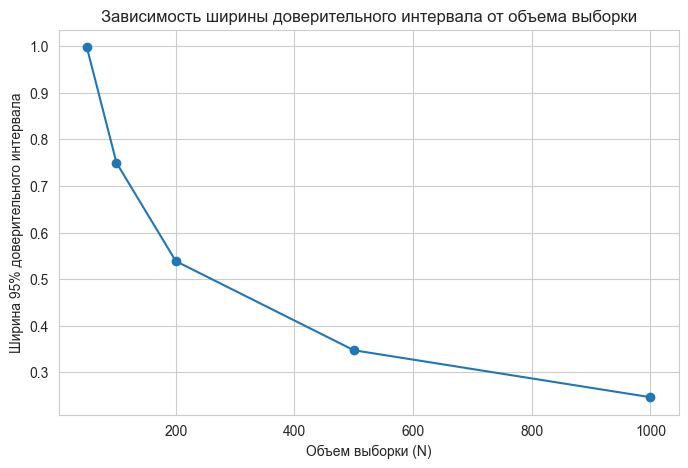

In [21]:
N_values = [50, 100, 200, 500, 1000]
ci_widths = []
iters = 500

for n in N_values:
    n_sum = 0
    for _ in range(iters):
        sample = np.random.normal(size=n, loc=5, scale=2)
        means_n = np.zeros(n)

        for i in range(n):
            bootstrap_sample = np.random.choice(sample, size=n, replace=True)
            means_n[i] = np.mean(bootstrap_sample)

        ci = bootstrap_ci(means_n, alpha=0.05)
        n_sum += ci[1] - ci[0]
    ci_widths.append(n_sum / iters)

plt.figure(figsize=(8, 5))
plt.plot(N_values, ci_widths, 'o-')
plt.xlabel('Объем выборки (N)')
plt.ylabel('Ширина 95% доверительного интервала')
plt.title('Зависимость ширины доверительного интервала от объема выборки')
plt.grid(True)
plt.show()

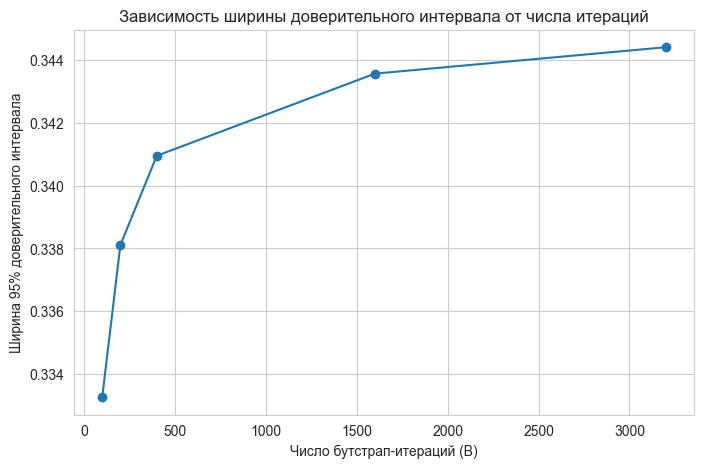

In [22]:
B_values = [100, 200, 400, 1600, 3200]
B_ci_widths = []

sample = np.random.normal(loc=5, scale=2, size=500)
for b in B_values:
    w_sum = 0
    for _ in range(iters):
        means_b = np.zeros(b)
        for i in range(b):
            bootstrap_sample = np.random.choice(sample, size=500, replace=True)
            means_b[i] = np.mean(bootstrap_sample)
        ci = bootstrap_ci(means_b, alpha=0.05)
        w_sum += ci[1] - ci[0]
    B_ci_widths.append(w_sum / iters)


plt.figure(figsize=(8, 5))
plt.plot(B_values, B_ci_widths, 'o-')
plt.xlabel('Число бутстрап-итераций (B)')
plt.ylabel('Ширина 95% доверительного интервала')
plt.title('Зависимость ширины доверительного интервала от числа итераций')
plt.grid(True)
plt.show()

# Проверка покрытия интервалов
Для N (0, 1):
* Сгенерируйте 100 выборок N = [50, 100, 200, 500, 1000]
* Постройте 95%-доверительный интервал среднего B = [100, 200, 400, 1600, 3200]
* Определите долю интервалов, содержащих μ = 0

In [13]:
results = []

for n in N_values:
    for b in B_values:
        coverage = 0
        for _ in range(100):
            sample = np.random.normal(loc=0, scale=1, size=n)
            bootstrap_means = np.zeros(b)

            for i in range(b):
                bootstrap_sample = np.random.choice(sample, size=n, replace=True)
                bootstrap_means[i] = np.mean(bootstrap_sample)

            ci = bootstrap_ci(bootstrap_means, 0.05)
            if ci[0] <= 0 <= ci[1]:
                coverage += 1

        results.append({'N': n, 'B': b, 'coverage': coverage/100})

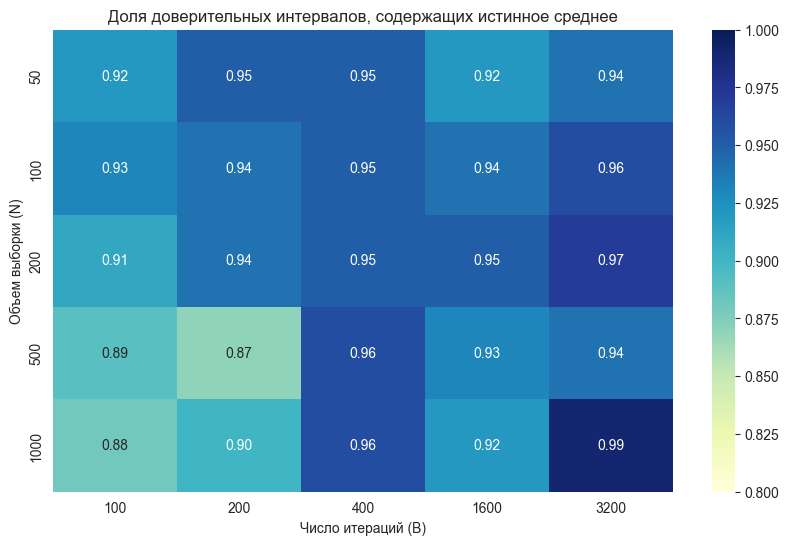

In [14]:
df = pd.DataFrame(results)
pivot_table = df.pivot(index='N', columns='B', values='coverage')
# print(pivot_table)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu", vmin=0.8, vmax=1.0)
plt.title('Доля доверительных интервалов, содержащих истинное среднее')
plt.xlabel('Число итераций (B)')
plt.ylabel('Объем выборки (N)')
plt.show()